
## Table of Contents

- [Data Collection](#data-collection)
- [Data Validation](#data-validation)
- [Billing Data Analysis](#billing-data-analysis)
- [Report Generation](#report-generation)

    


In [ ]:
!pip install openpyxl

import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=None
pd.options.display.expand_frame_repr = False

from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

### Data Collection 

In [2]:
file_path = "~/Downloads/Dataset.xlsx"
try:
    df = pd.read_excel(file_path, engine="openpyxl")
    print(f'✅ Dataset loaded successfully\n')
    print(f"{'-' * 20}\n")
    
    print(f'Shape of dataset: {df.shape[0]} rows {df.shape[1]} columns\n')
    print(f"{'-' * 20}\n")
    
    global missing_values
    missing_values = df.isnull().sum()
    print(f'Number of NaN values in each column: \n{df.isnull().sum()}\n')
    print(f"{'-' * 20}\n")
    
    global duplicated_rows
    duplicated_rows = 
    print(f'Number of duplicate rows: {df.duplicated().sum()}\n')
    print(f"{'-' * 20}\n")

    print(f'Dataset dtypes:\n{df.dtypes}')
    print(f"{'-' * 20}\n")
    
    print(f'First 5 rows of dataset:\n {df.head(5)}')

    
except Exception as e:
    print("❌ Dataset not loaded successfully.")
    print(f"Error: {e}")


✅ Dataset loaded successfully

--------------------

Shape of dataset: 160 rows 7 columns

--------------------

Number of NaN values in each column: 
Account ID       0
Customer Name    0
Billing Date     0
Amount           0
Status           0
Description      0
Department       0
dtype: int64

--------------------

Number of duplicate rows: 0

--------------------

Dataset dtypes:
Account ID                int64
Customer Name            object
Billing Date     datetime64[ns]
Amount                  float64
Status                   object
Description              object
Department               object
dtype: object
--------------------

First 5 rows of dataset:
    Account ID  Customer Name Billing Date      Amount   Status   Description   Department
0        1001   David Wilson   2023-01-01  193.987558  Pending  Consultation   Pediatrics
1        1002  Alice Johnson   2023-01-02  370.656021  Pending      Purchase  Orthopedics
2        1003  Sophia Garcia   2023-01-03  233.019486  Pe

In [3]:
df.head(10)

,Account ID,Customer Name,Billing Date,Amount,Status,Description,Department
0,1001,David Wilson,2023-01-01,193.987558,Pending,Consultation,Pediatrics
1,1002,Alice Johnson,2023-01-02,370.656021,Pending,Purchase,Orthopedics
2,1003,Sophia Garcia,2023-01-03,233.019486,Pending,Lab Test,Pharmacy
3,1004,Olivia Davis,2023-01-04,296.120725,Paid,Follow-up,Pharmacy
4,1005,David Wilson,2023-01-05,294.654764,Paid,Therapy,ENT
5,1006,Olivia Davis,2023-01-06,485.654759,Paid,Procedure,General Practice
6,1007,Chris Lee,2023-01-07,2864.738488,Pending,Lab Test,General Practice
7,1008,Sophia Garcia,2023-01-08,244.228596,Pending,Therapy,Neurology
8,1009,Sophia Garcia,2023-01-09,183.370132,Pending,Emergency,Cardiology
9,1010,Olivia Davis,2023-01-10,127.601073,Unpaid,Medication,Dermatology


### Data validation

Check for correct formats in columns

In [4]:

def validate_data(df):
    print("Data Validation Report")
    print(f"{'=' * 20}\n")

    # Status column
    print('*** Status column ***\n')

    # check values in Status column 
    global valid_status_codes
    valid_status_codes = ["Paid", "Pending", "Unpaid"]
    # retrieve values in Status column that are invalid and add it to a list
    invalid_status = df.loc[~df["Status"].isin(valid_status_codes),"Status"].unique().tolist()
    global invalid_status_rows
    invalid_status_rows = df[~df["Status"].isin(valid_status_codes)]
    
    if len(invalid_status) > 0:
        print(f'There are invalid status codes: {invalid_status}\n')
        print(f'Rows with invalid status values:\n\n{invalid_status_rows}\n')
    else:
        print('There are no invalid status codes.')
    
    print(f"\n{'-' * 50}\n")
    
    # Amount column
    print('*** Amount column ***\n')

    # Check for negative amounts
    global invalid_amounts
    invalid_amounts = df.loc[df["Amount"] < 0, "Amount"].tolist()
    invalid_amounts_rows = df[df["Amount"] < 0]
    
    if len(invalid_amounts) > 0:
        print(f'There are invalid amounts in column: \n{invalid_amounts}\n')
        print(f'Rows with invalid amount values:\n\n{invalid_amounts_rows}')
        
    else:
        print(f'There are no invalid amounts in column')
    
    print(f"\n{'-' * 50}\n")

    
    # Billing date column
    print('*** Billing date column ***\n')
    
    # Check for billing dates that are beyond current date 
    global invalid_dates
    invalid_dates = df.loc[df["Billing Date"] > datetime.now(), "Billing Date"].tolist()
    # Select rows where "Billing Date" is in invalid_dates
    invalid_dates_rows = df[df["Billing Date"].isin(invalid_dates)]   
    
    if len(invalid_dates) > 0:
        print(f'There are invalid date values in column: \n{invalid_dates}\n')
        print(f'Rows with invalid date values:\n\n{invalid_dates_rows}')

    else:
        print(f'There are no invalid date values in column')
    
    print(f"\n{'-' * 50}\n")
    
    print('*** Identify outliers in amount ***\n')

    # IQR to measure outliers
    # Outliers are defined as values that are lower than Q1 − 1.5 × IQR or greater than Q3 + 1.5 × IQR
    Q1 = df['Amount'].quantile(0.25)
    Q3 = df['Amount'].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df['Amount'] < (Q1 - 1.5 * IQR)) | (df['Amount'] > (Q3 + 1.5 * IQR))]
    print(outliers)
    
    print(f"\n{'-' * 50}\n")

    
    # Remove rows with invalid dates and negative amounts 
    print('*** Remove rows with invalid dates or billing amounts ***\n')
    
    # Combines unique indexes
    remove_rows = (
                    invalid_amounts_rows.index
                    .union(invalid_dates_rows.index)  
                    .union(invalid_status_rows.index)
                    )
    print(remove_rows)
    
    df = df.drop(index = remove_rows)
    
    print(f'\n✅ {len(remove_rows)} rows have been removed from dataset due to invalid dates, status codes and/or bill amounts.')
    
    return df 

df_validated = validate_data(df)


Data Validation Report

*** Status column ***

There are invalid status codes: ['Unknown']

Rows with invalid status values:

     Account ID       Customer Name Billing Date       Amount   Status   Description   Department
11         1012       Liam Martinez   2023-01-12   236.157919  Unknown       Therapy   Cardiology
36         1037          Jane Smith   2023-02-06   240.093602  Unknown       Therapy  Dermatology
56         1057        David Wilson   2023-02-26   327.690984  Unknown      Purchase    Neurology
71         1072        Olivia Davis   2023-03-13    73.973687  Unknown  Consultation     Oncology
99         1100       Liam Martinez   2023-04-10   118.669234  Unknown     Emergency          ENT
115        1036    Christopher Moon   2025-03-03   201.470000  Unknown     Follow-up   Pediatrics
126        1047           Nancy Lee   2024-04-11   112.250000  Unknown  Consultation   Pediatrics
137        1058         Nancy Evans   2025-02-12   247.150000  Unknown  Consultation  Orth

### Billing Analysis:

- Analyze billing data for accuracy and timeliness
- Identify discrepancies or unusual patterns
- Analyze metrics such as:
- Billing cycle times
- Payment discrepancies
- Late payment occurrences
- Average payment amounts

In [5]:
def analyze_billing(df):
    print("Billing Analysis Report")
    print(f"{'=' * 20}\n")
    
    total_amount = df['Amount'].sum()

    # Basic statistics
    print("\n1. Statistics of values in 'Amount' column:\n")
    print(df['Amount'].describe())
    
    # Payment by status
    payment_by_status = df.groupby('Status')['Amount'].agg(['sum', 'mean', 'count'])
    payment_by_status['pct_by_amt'] = round(payment_by_status['sum'] / total_amount * 100,2)
    
    print(f"\n{'-' * 50}\n")

    
    print("\n2. Payment by Status:")
    print(payment_by_status)
    
    # Payment by department
    payment_by_dept = df.groupby('Department')['Amount'].agg(['sum', 'mean', 'count'])
    payment_by_dept['pct_by_amt'] = round(payment_by_dept['sum'] / total_amount * 100,2)
    payment_by_dept = payment_by_dept.sort_values(by = 'pct_by_amt', ascending = False)
    
    print(f"\n{'-' * 50}\n")
    
    print("\n3. Payment by Department:")
    print(payment_by_dept)
    
    # Time series analysis, since column is alr in datetime format, will not need to convert to dtype
    months = df.set_index('Billing Date').resample('M')['Amount'].sum()
    
    print(f"\n{'-' * 50}\n")
    
    print("\n4. Payment by Months:")
    print(months)
    
    # Identify highly transactions (top 5%)
    top5_amount = df['Amount'].quantile(0.95)
    top5 = df[df['Amount'] > top5_amount]
    
    print(f"\n{'-' * 50}\n")
    
    print(f"\n5. Number of transactions in top 5% percentile : {top5.shape[0]}")
    
    return df
    
df_analyzed = analyze_billing(df_validated)



Billing Analysis Report


1. Statistics of values in 'Amount' column:

count     143.000000
mean      413.748617
std       580.821687
min        50.581003
25%       158.937776
50%       285.250000
75%       407.805404
max      3849.771331
Name: Amount, dtype: float64

--------------------------------------------------


2. Payment by Status:
                  sum        mean  count  pct_by_amt
Status                                              
Paid     14650.598287  287.266633     51       24.76
Pending  31080.573929  661.288807     47       52.53
Unpaid   13434.879995  298.552889     45       22.71

--------------------------------------------------


3. Payment by Department:
                          sum        mean  count  pct_by_amt
Department                                                  
ENT               9508.416139  731.416626     13       16.07
Oncology          8036.312683  730.573880     11       13.58
Neurology         7630.508247  586.962173     13       12.90
Pharma

### Data Visualization



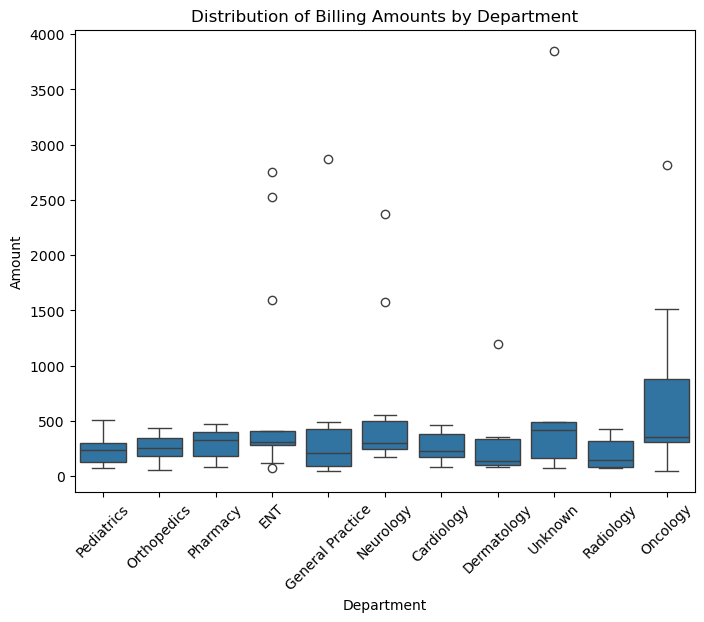


------------------------------------------------------------------------------------------------------------------------



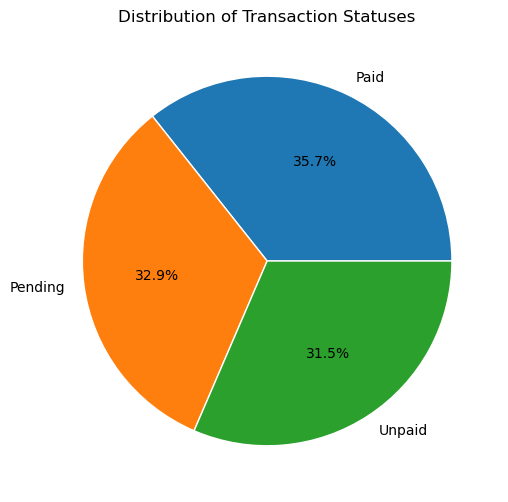


------------------------------------------------------------------------------------------------------------------------



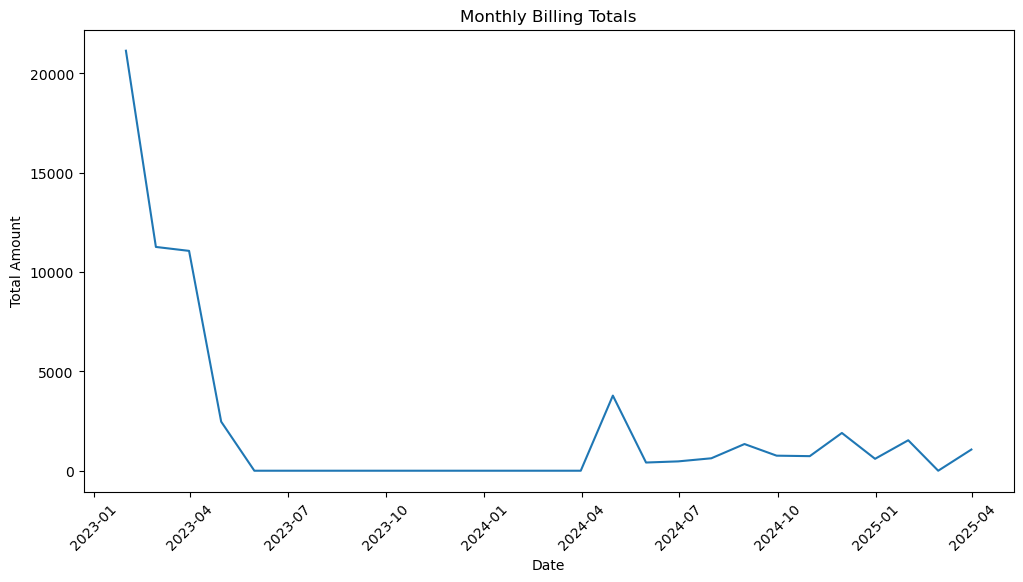

In [6]:
def create_visuals(df):
    # Boxplot of Billing Amounts by Department
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Department', y = 'Amount', data = df)
    plt.xticks(rotation =45)
    plt.title('Distribution of Billing Amounts by Department')
    
    plt.show()
    
    print(f"\n{'-' * 120}\n")

    # Pie chart showing distribution of count of status codes
    plt.figure(figsize=(8, 6))
    df['Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', wedgeprops=dict(edgecolor='white', linewidth=1), )
    plt.title('Distribution of Transaction Statuses')
    plt.gca().get_yaxis().set_visible(False)
    plt.show()
    
    print(f"\n{'-' * 120}\n")

    # Line chart depicting revenue received per month
    # reset index to give a dataframe, instead of a series (cannot be used in seaborn)
    monthly_totals = df.set_index('Billing Date').resample('M')['Amount'].sum().reset_index()

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_totals, x='Billing Date', y='Amount')

    plt.title('Monthly Billing Totals')
    plt.xlabel('Date')
    plt.ylabel('Total Amount')
    plt.xticks(rotation=45) 
    plt.show()

    

create_visuals(df_analyzed)



### Generate report 

In [7]:
def generate_report(df):
    report = "Comprehensive Billing Audit Report\n"
    report += f"\n{'=' * 120}\n"
    
    # Data overview
    report += '1a. Original Dataset overview:\n'
    report += f"   - Total transactions: {df.shape[0]}\n"
    latest_date = df["Billing Date"].max().strftime('%d-%b-%Y')
    earliest_date = df["Billing Date"].min().strftime('%d-%b-%Y')
    report += f"   - Date range: {earliest_date} to {latest_date}\n"
    report += f"   - Total billing amount: ${df['Amount'].sum():,.2f}\n\n"
    
    report += f"1b. Updated Dataset overview:\n"
    report += f"   - Total transactions: {df_validated.shape[0]}\n"
    latest_date_updated = df_validated["Billing Date"].max().strftime('%d-%b-%Y')
    earliest_date_updated = df_validated["Billing Date"].min().strftime('%d-%b-%Y')
    report += f"   - Date range: {earliest_date_updated} to {latest_date_updated}\n"
    report += f"   - Total billing amount: ${df_validated['Amount'].sum():,.2f}\n"
    
    report += f"\n{'-' * 120}\n"
    
    report += f"2a. Original Dataset quality:\n"
    report += f"   - Missing Values: {missing_values.sum()}\n"
    report += f"   - Duplicates: {duplicated_rows}\n"
    report += f"   - Rows with invalid Status code: {len(invalid_status_rows)}\n"
    report += f"   - Rows with invalid Billing Dates: {len(invalid_dates)}\n"
    report += f"   - Rows with invalid Billing Amounts: {len(invalid_amounts)}\n\n"
    
    report += f"2b. Updated Dataset quality:\n"
    report += f"   - Missing Values: {df_validated.isna().sum().sum()}\n"
    report += f"   - Duplicates: {df_validated.duplicated().sum()}\n"
    
    # use df_validated to find any dates in Date column that is more than today's date
    df_validated_invalid_dates = df_validated.loc[df["Billing Date"] > datetime.now(), "Billing Date"].tolist()
    
    # use df_validated to find any status code in Status code column that is not valid
    df_validated_invalid_status = df_validated.loc[~df_validated["Status"].isin(valid_status_codes),"Status"].unique().tolist()
    
    report += f"   - Rows with invalid Status code: {len(df_validated_invalid_status)}\n"
    
    report += f"   - Rows with invalid Billing Dates: {len(df_validated_invalid_dates)}\n"
    report += f"   - Rows with invalid Billing Amounts: {len(df_validated[df_validated['Amount'] < 0])}\n"
    
    report += f"\n{'-' * 120}\n"
    
    report += f"3a. Billing Analysis (Original dataset)\n"
    report += f"   - Total billing amount: ${df['Amount'].sum():,.2f}\n"
    report += f"   - Average billing amount: ${df['Amount'].mean():,.2f}\n\n"
    
    report += f"3b. Billing Analysis (Updated dataset)\n"
    report += f"   - Total billing amount: ${df_validated['Amount'].sum():,.2f}\n"
    report += f"   - Average billing amount: ${df_validated['Amount'].mean():,.2f}\n"
    report += f"{df_validated.groupby('Status')['Amount'].sum().round(2).to_string()}"
    
    print(report)
    
generate_report(df)

Comprehensive Billing Audit Report

1a. Original Dataset overview:
   - Total transactions: 160
   - Date range: 01-Jan-2023 to 01-Apr-2026
   - Total billing amount: $62,677.49

1b. Updated Dataset overview:
   - Total transactions: 143
   - Date range: 01-Jan-2023 to 30-Mar-2025
   - Total billing amount: $59,166.05

------------------------------------------------------------------------------------------------------------------------
2a. Original Dataset quality:
   - Missing Values: 0
   - Duplicates: 0
   - Rows with invalid Status code: 10
   - Rows with invalid Billing Dates: 5
   - Rows with invalid Billing Amounts: 3

2b. Updated Dataset quality:
   - Missing Values: 0
   - Duplicates: 0
   - Rows with invalid Status code: 0
   - Rows with invalid Billing Dates: 0
   - Rows with invalid Billing Amounts: 0

------------------------------------------------------------------------------------------------------------------------
3a. Billing Analysis (Original dataset)
   - Total 